# Interactive Plots

The `cytoflow` package is designed for both scripting and interactive use.  As much as I would like the whole world to use data-driven gating and analysis methods, many workflows still require manually specifying gates, and this is most easily done by drawing the gate on a plot.

Fortunately, through the combination of `matplotlib` and the Jupyter notebook, we can have the best of both worlds: interactive REPL *and* plots that we can point-and-click with.

Clearly, this is best run interactively; but if you're looking at this notebook online, you should still get a flavor of the package's capabilities.

<div class="alert alert-block alert-warning">
This notebook uses the interactive widges provided by the <code>ipympl</code> package. If you are seeing only blank spaces where you are expecting interactive plots, make sure you are using the <strong>Jupyter Lab</strong> interface instead of the <strong>Jupyter Notebook</strong> interface. For whatever reason, it seems to work more consistently.
</div>

----

First, set up `Jupyter`'s interactive `matplotlib` support, and import the `cytoflow` module.

In [1]:
# in some buggy versions of the Jupyter notebook, this needs to be in its OWN CELL.
%matplotlib widget

In [2]:
import cytoflow as flow

# if your figures are too big or too small, you can scale them by changing matplotlib's DPI
import matplotlib
matplotlib.rc('figure', dpi = 160)

Load a few example files, conditioning them on a float variable `Dox`.

In [3]:
tube1 = flow.Tube(file='data/RFP_Well_A3.fcs', conditions = {"Dox" : 10.0})
tube2 = flow.Tube(file='data/CFP_Well_A4.fcs', conditions = {"Dox" : 1.0})

import_op = flow.ImportOp(conditions = {"Dox" : "float"},
                          tubes = [tube1, tube2])

ex = import_op.apply()

Plot the `Y2-A` channel.  We can see there's a bimodal distribution in one of the tubes.

<IPython.core.display.Javascript object>


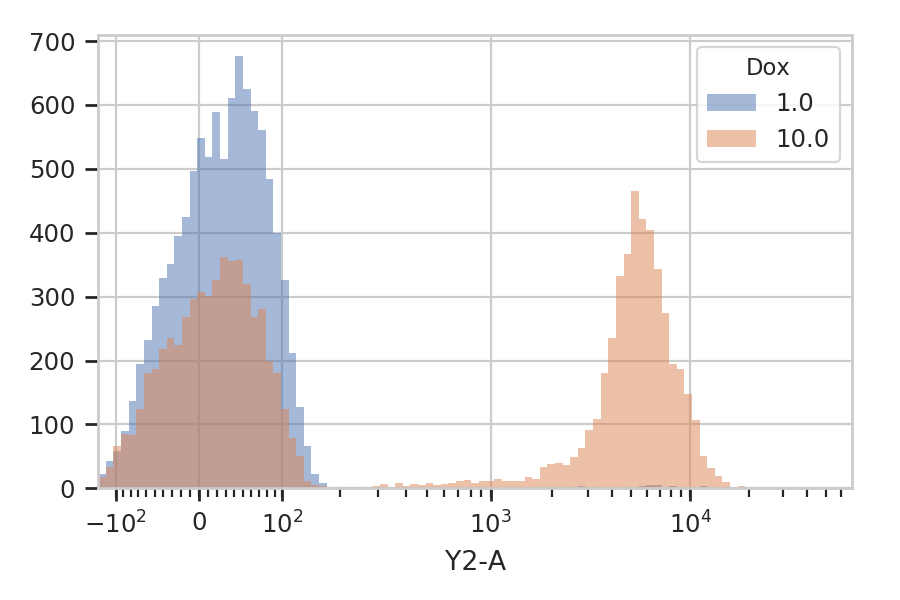

In [4]:
flow.HistogramView(channel = "Y2-A",
                   scale = "logicle",
                   huefacet = "Dox").plot(ex)

Let's use a `ThresholdOp` to split out the top peak.  You can get an interactive plot (the same `HistogramView` as above) by calling `ThresholdOp`'s `default_view()` method.  The view that gets returned is linked back to the `ThresholdOp` that produced it: it shows the proper channel, and when you draw a threshold on it the `ThresholdOp` instance's `threshold` trait gets updated.

One other thing to note: because the `ThresholdOp`'s default view is derived from `HistogramView`, you can use all (well, most!) of the functionality in a regular `HistogramView`.  Here, we'll use the the `huefacet` trait to plot the same multi-colored histogram as above.

As shown below, the steps for using an interactive view are:
* Instantiate the operation
* Call the operation's `default_view()` to get the interactive view.
* Plot the view.
* Set the view's `interactive` trait to `True`.  This step can go before or after calling `plot()`.
* Note that the view now shows a cursor (a vertical blue line) that follows your mouse as you move it around the view.  Select the threshold you want, then click the mouse button to set it.  A fixed blue line appears.

<IPython.core.display.Javascript object>


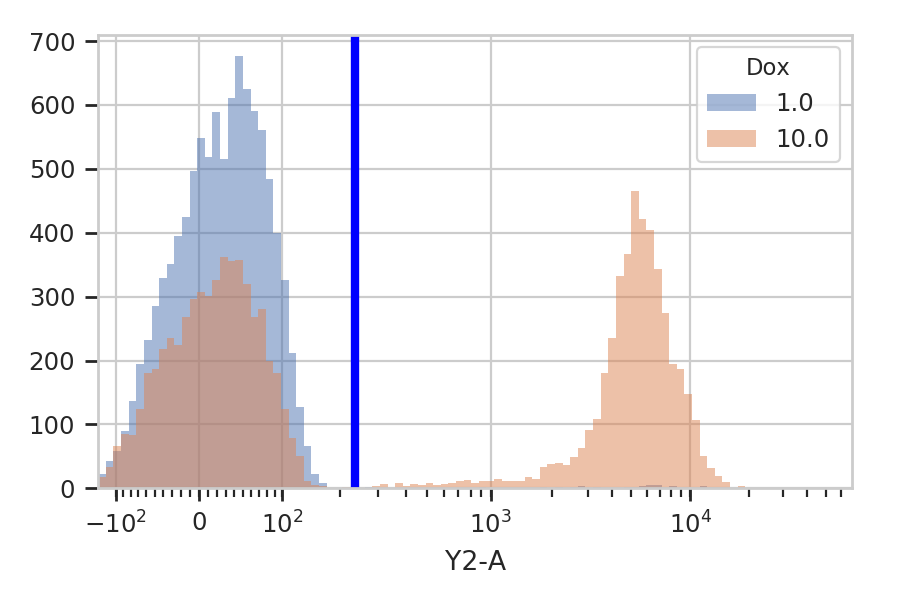

In [5]:
t = flow.ThresholdOp(name = "Threshold",
                     channel = "Y2-A")
tv = t.default_view()
tv.huefacet = "Dox"
tv.scale = "logicle"
tv.interactive = True

tv.plot(ex)

After you've drawn a threshold on the plot, look at the `ThresholdOp` instance's `threshold` trait and see that it matches the threshold you drew.

In [6]:
t.threshold

235.97817044140453

You can then apply the newly parameterized operation to the data set.

<IPython.core.display.Javascript object>


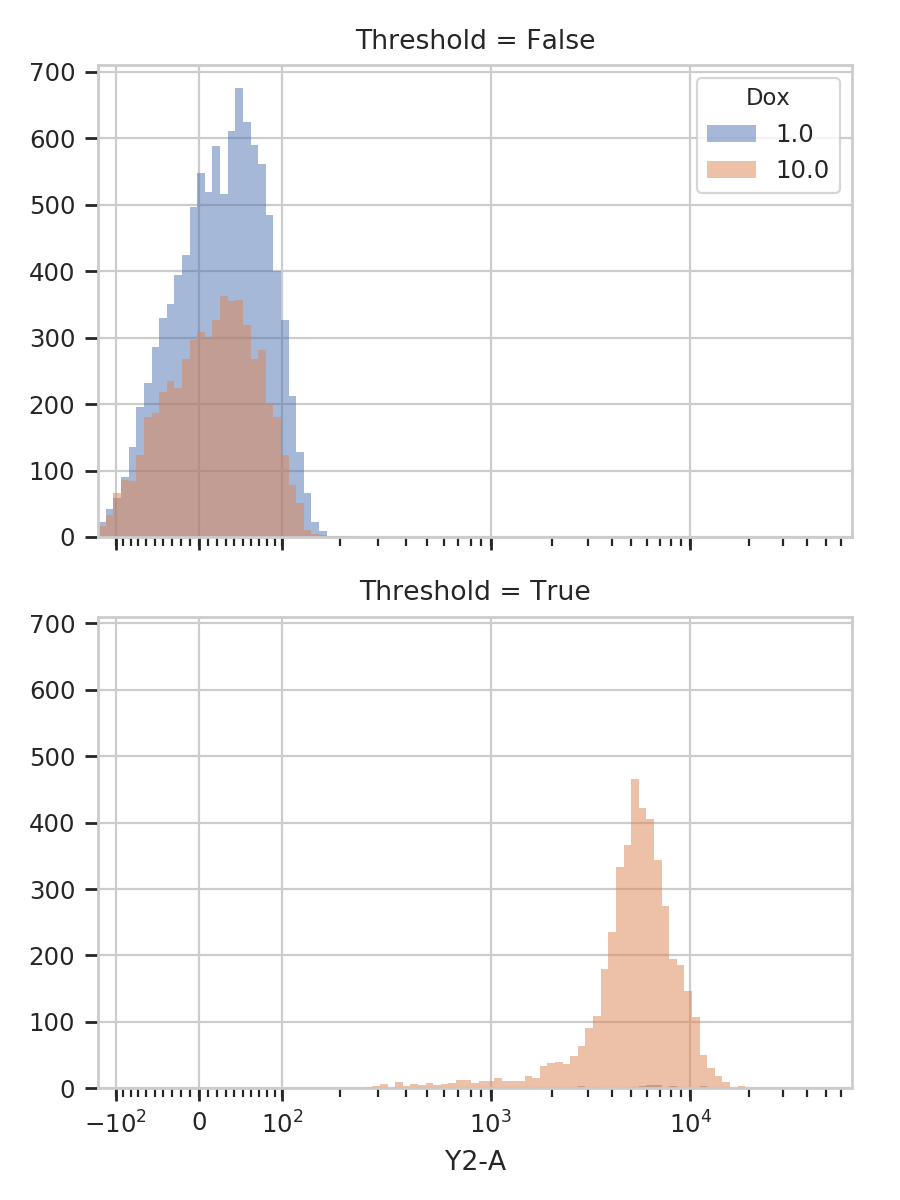

In [7]:
ex2 = t.apply(ex)
flow.HistogramView(channel = "Y2-A",
                   scale = "logicle",
                   huefacet = "Dox",
                   yfacet = "Threshold").plot(ex2)

We can use a similar strategy with the `RangeOp`.  The setup is very much the same; but instead of a single click, drag the cursor to set the range.

Also note that we can compress the invocation by passing the parameters to `default_view()` (as we would to a constructor.)

<IPython.core.display.Javascript object>


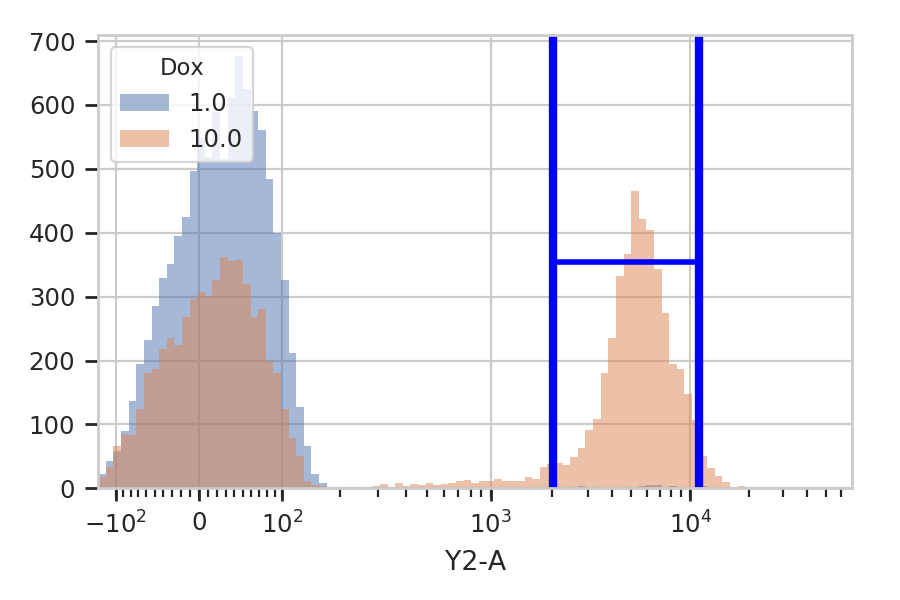

In [8]:
r = flow.RangeOp(name = "Range",
                 channel = "Y2-A")

r.default_view(huefacet = "Dox",
               scale = "logicle",
               interactive = True).plot(ex)

In [9]:
r.low, r.high

(2007.3540593264756, 11086.840684744158)

You can also draw ranges on 2D plots.  Again, drag the cursor to draw a range.

<IPython.core.display.Javascript object>


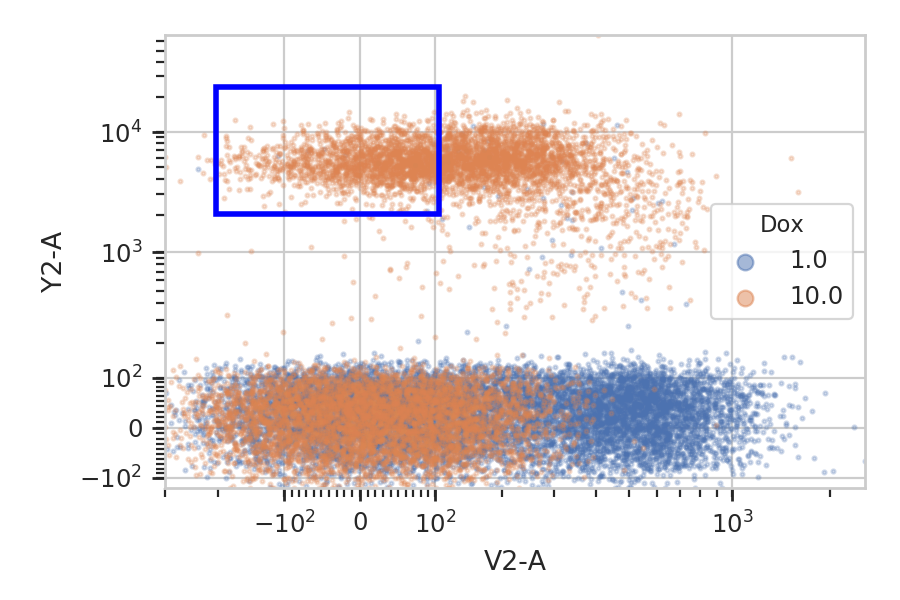

In [10]:
r2d = flow.Range2DOp(name = "Range2D",
                     xchannel = "V2-A",
                     ychannel = "Y2-A")

r2d.default_view(huefacet = "Dox",
                 xscale = "logicle",
                 yscale = "logicle",
                 interactive = True).plot(ex)

In [11]:
r2d.xlow, r2d.xhigh, r2d.ylow, r2d.yhigh

(-203.01634412009793,
 104.94315196137035,
 2038.5106539405642,
 24562.81382553335)

You can specify a polygon this way too.  Unforunately, the JavaScript link between the Jupyter notebook and the Python kernel is a little slow, so the performance here is ... not ideal.  Be patient.

Single click to set vertices; click the first vertex a second time to close the polygon.

<IPython.core.display.Javascript object>


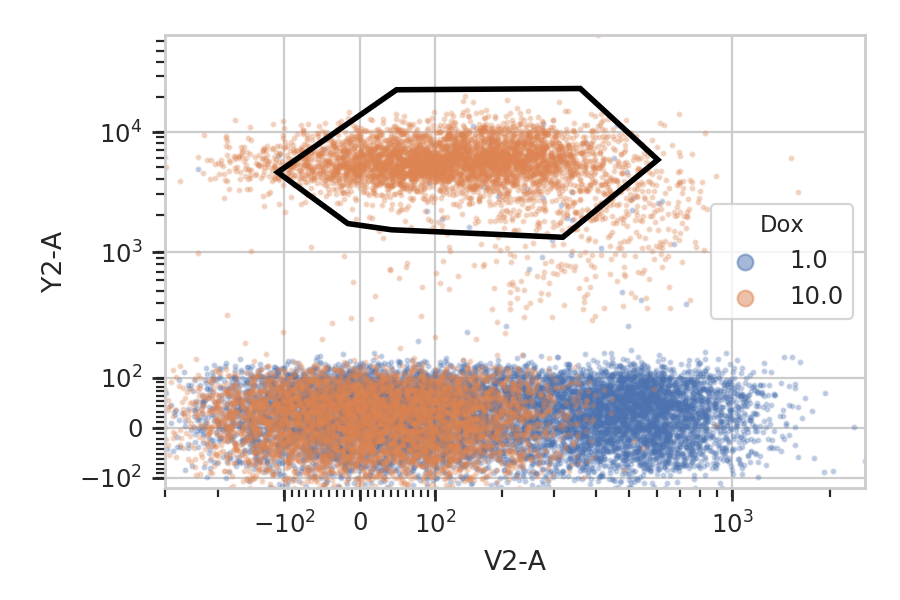

In [12]:
p = flow.PolygonOp(name = "Polygon",
                   xchannel = "V2-A",
                   ychannel = "Y2-A")

pv = p.default_view(huefacet = "Dox",
                    xscale = "logicle",
                    yscale = "logicle",
                    interactive = True)

pv.plot(ex)

In [13]:
p.vertices

[(-109.22381313438126, 4552.48571716678),
 (47.581169555466914, 23032.99288702212),
 (359.0848827803494, 23609.72249982525),
 (603.6648998740229, 5808.103794745581),
 (318.0855902021553, 1315.7691688032837),
 (41.025767639853456, 1513.9301298793557),
 (41.025767639853456, 1513.9301298793557),
 (-15.72537611199034, 1702.8785363694597),
 (-15.72537611199034, 1702.8785363694597)]

You can also specify a quadrant (or quad) gate.  Move the cursor to where you want it; click to set the gate.

<IPython.core.display.Javascript object>


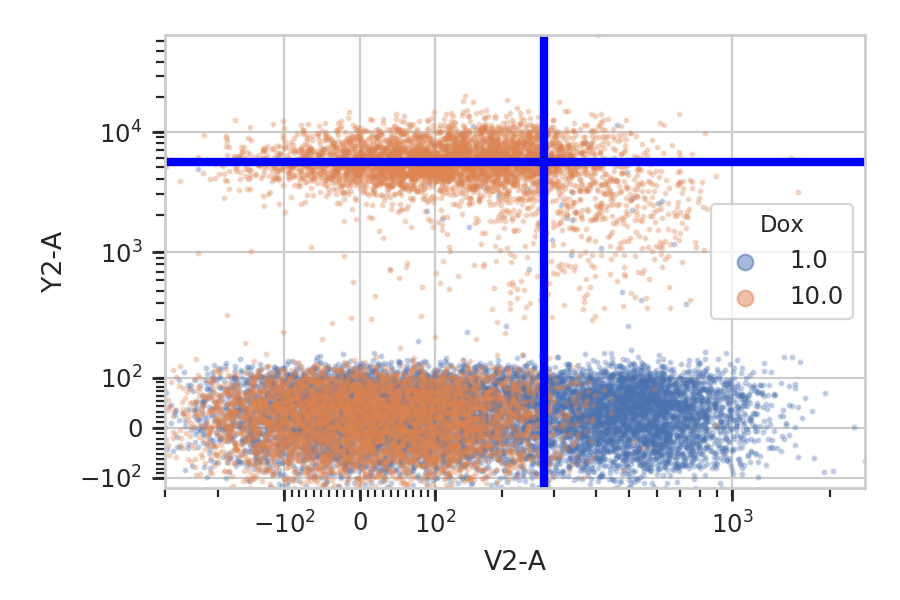

In [14]:
q = flow.QuadOp(name = "Quad",
                xchannel = "V2-A",
                ychannel = "Y2-A")

qv = q.default_view(huefacet = "Dox",
                    xscale = "logicle",
                    yscale = "logicle",
                    interactive = True)

qv.plot(ex)

In [15]:
q.xthreshold, q.ythreshold

(278.2187356624719, 5531.465729647518)